회귀분석 실습 2  
공공 자전거 수요 예측(Bike Sharing Demand)  
https://www.kaggle.com/c/bike-sharing-demand/overview  
- 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를  
    기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.  

  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지  
    데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.  

Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [17]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')
df_train = pd.read_csv('C:/Users/5/My_Study/Z_running_file/bike-sharing-demand/train.csv')
df_test = pd.read_csv('C:/Users/5/My_Study/Z_running_file/bike-sharing-demand/train.csv')



In [25]:
df_train.columns # df_train의 컬럼 이름들을 리스트 형태로 반환

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [26]:
df_test.columns # df_test의 컬럼 이름들을 리스트 형태로 반환

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [27]:
print(df_train.shape,df_test.shape) # train, test의 행렬 개수 출력 (10886, 12) (6493, 9)

(10886, 12) (10886, 12)


In [28]:
df_train.describe() # 데이터프레임의 기초 통계량을 요약

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [29]:
df_train.info() # datetime : object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
df_train['datetime'] # 0번째 : 2011-01-01 00:00:00

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [35]:
df_train["date"] = df_train.datetime.apply(lambda x : x.split()[0])
df_train["hour"] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_train["weekday"] = df_train.date.apply(lambda dateString : calendar.day_name[
    datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train["month"] = df_train.date.apply(lambda dateString : calendar.month_name[
    datetime.strptime(dateString,"%Y-%m-%d").month])
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
# 첫 번째 줄은 datetime 열에서 날짜 부분만 추출하여 date 열에 저장합니다.
# 두 번째 줄은 datetime 열에서 시간 부분만 추출하여 hour 열에 저장합니다.
# 세 번째 줄은 date 열의 값들을 이용하여 요일(월요일, 화요일 등)을 계산하여 weekday 열에 저장합니다.
    # 이때, datetime.strptime() 함수를 이용하여 날짜 형식을 파싱한 뒤,
    # calendar.day_name 리스트를 이용하여 요일 이름을 얻습니다.
# 네 번째 줄은 date 열의 값들을 이용하여 월 이름을 계산하여 month 열에 저장합니다.
    # 이때, datetime.strptime() 함수를 이용하여 날짜 형식을 파싱한 뒤,
    # calendar.month_name 리스트를 이용하여 월 이름을 얻습니다.
# 다섯 번째 줄은 season 열의 값들을 1, 2, 3, 4에서 Spring, Summer, Fall, Winter로 변경하여
    # season 열에 저장합니다.
# 여섯 번째 줄은 weather 열의 값들을 1, 2, 3, 4에서 각각의 날씨 형태 문자열로 변경하여
    # weather 열에 저장합니다.
    # 이때, 문자열 안에서 '' 기호를 이용하여 여러 줄에 걸쳐 문자열을 작성할 수 있습니다.

datetime 컬럼에서 날짜와 시간 정보를 분리하여 date와 hour 컬럼을 추가합니다.  
date 컬럼에서 요일 정보를 추출하여 weekday 컬럼을 추가합니다.  
date 컬럼에서 월(month) 정보를 추출하여 month 컬럼을 추가합니다.  
season 컬럼의 값이 1, 2, 3, 4인 경우를 각각  
봄(Spring), 여름(Summer), 가을(Fall), 겨울(Winter)로 매핑하여 season 컬럼을 업데이트 합니다.  
weather 컬럼의 값이 1, 2, 3, 4인 경우를 각각  
Clear + Few clouds + Partly cloudy + Partly cloudy, Mist + Cloudy, Mist + Broken clouds,  
Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds,  
Light Rain + Scattered clouds, Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
로 매핑하여 weather 컬럼을 업데이트 합니다.

In [34]:
df_train.info() # 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  Hour        10886 non-null  object 
 14  hour        10886 non-null  object 
 15  weekday     10886 non-null  object 
 16  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(8)
memory usage: 1.4+ MB


- 결측치 확인

<Axes: >

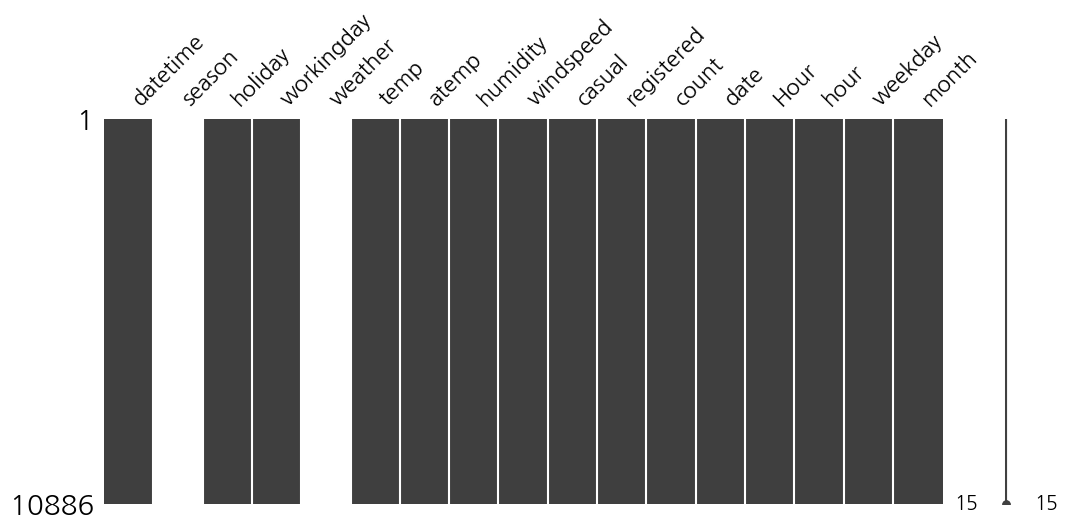

In [36]:
import missingno as msno #결측치 보는 plot
msno.matrix(df_train,figsize=(12,5)) #결측치가 있다면 하얀색 줄이 그어짐.

In [37]:
df_train_1 = df_train.copy() #훼손 방지
df_test_1 = df_test.copy()

df_train_1['datetime'] = pd.to_datetime(df_train_1['datetime'])

In [38]:
type(df_train_1)

pandas.core.frame.DataFrame

In [42]:
# DataFrame 가능한 것.
df_train_1['Year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['minute'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second
# 요일 데이터 - 일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek